# Import Library

In [4063]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

# Load Dataset

In [4064]:
df_train = pd.read_csv('./dataset/train_dataset.csv')
df_test = pd.read_csv('./dataset/test_dataset_no_y.csv')

In [4065]:
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.407166,E,W,2.0,M,C,1.127628,-0.657689,-0.415323,76.124758,20.710704
1,44.417166,M,W,1.0,H,C,0.957628,-0.667689,-0.475323,85.834758,94.202404
2,28.047166,M,W,4.0,L,R,0.717628,-1.107689,-0.385323,13.814758,43.043004
3,-0.462834,NaN,W,2.0,L,C,1.717628,-1.547689,-0.425323,29.344758,7.956004
4,42.957166,M,W,3.0,M,C,0.747628,-1.847689,-0.135323,NaN,62.397804


In [4066]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      757 non-null    float64
 1   x2      760 non-null    object 
 2   x3      762 non-null    object 
 3   x4      764 non-null    float64
 4   x5      758 non-null    object 
 5   x6      761 non-null    object 
 6   x7      761 non-null    float64
 7   x8      756 non-null    float64
 8   x9      763 non-null    float64
 9   x10     758 non-null    float64
 10  y       758 non-null    float64
dtypes: float64(7), object(4)
memory usage: 68.9+ KB


# Data Cleaning

In [4067]:
df_train.describe()

,x1,x4,x7,x8,x9,x10,y
count,757.000000,764.000000,761.000000,756.000000,763.000000,758.000000,758.000000
mean,24.825200,2.463351,1.749244,-1.179051,-0.323344,59.538307,53.993730
std,20.880903,1.082431,0.861297,0.431568,0.115757,31.805305,42.823339
min,-1.642834,1.000000,0.257628,-1.917689,-0.515323,3.134758,5.120804
25%,9.977166,2.000000,1.007628,-1.557689,-0.425323,33.527258,30.710379
50%,23.217166,2.000000,1.777628,-1.202689,-0.325323,59.799758,45.788304
75%,36.107166,3.000000,2.487628,-0.797689,-0.225323,85.799758,65.293729
max,143.194213,4.000000,3.247628,-0.417689,-0.115323,117.924758,328.493593


## Handle Wrong Dtype

## Cek Duplikat Data

In [4068]:
df_train.duplicated().sum()

0

In [4069]:
df_test.duplicated().sum()

0

## Cek Missing Value

In [4070]:
df_train.isna().sum()

x1     43
x2     40
x3     38
x4     36
x5     42
x6     39
x7     39
x8     44
x9     37
x10    42
y      42
dtype: int64

In [4071]:
df_test.isna().sum()

x1      7
x2     10
x3     11
x4     13
x5      8
x6     11
x7     10
x8      6
x9     12
x10     8
dtype: int64

In [4072]:
numerical_cols = df_train.drop(['y', 'x4'], axis=1).select_dtypes(['float64']).columns

In [4073]:
categorical_cols = df_train.select_dtypes(['object']).columns.to_list()
categorical_cols.append('x4')
test_categorical_cols = df_test.select_dtypes(['object']).columns.to_list()

## Handle Missing Value Variabel Numerik

<Axes: >

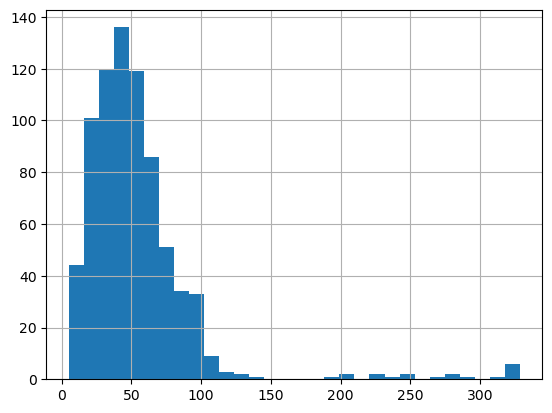

In [4074]:
df_train['y'].hist(bins=30)

In [4075]:
df_train['y'] = df_train['y'].fillna(df_train['y'].median())

In [4076]:
df_train[numerical_cols]

,x1,x7,x8,x9,x10
0,0.407166,1.127628,-0.657689,-0.415323,76.124758
1,44.417166,0.957628,-0.667689,-0.475323,85.834758
2,28.047166,0.717628,-1.107689,-0.385323,13.814758
3,-0.462834,1.717628,-1.547689,-0.425323,29.344758
4,42.957166,0.747628,-1.847689,-0.135323,NaN
...,...,...,...,...,...
795,18.237166,2.857628,-1.727689,-0.435323,82.144758
796,37.787166,2.147628,-1.747689,-0.315323,32.374758
797,36.127166,0.437628,-0.857689,-0.185323,62.894758
798,32.477166,2.447628,-1.207689,-0.465323,77.094758


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x7'}>],
       [<Axes: title={'center': 'x8'}>, <Axes: title={'center': 'x9'}>],
       [<Axes: title={'center': 'x10'}>, <Axes: >]], dtype=object)

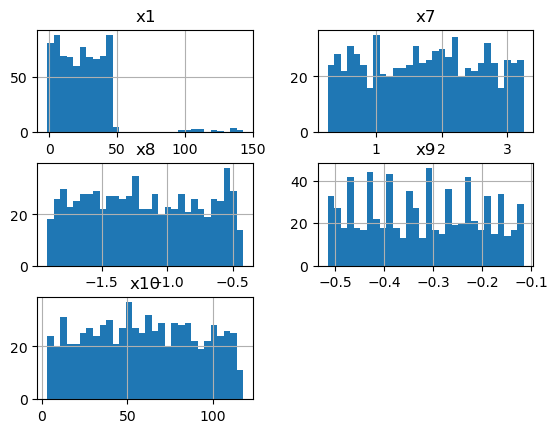

In [4077]:
df_train[numerical_cols].hist(bins=30)

## Menghapus Nilai Null pada Variabel Numerik Menggunakan Median karena distribusi data tidak normal

In [4078]:
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].median())

In [4079]:
df_train[numerical_cols].isna().sum()

x1     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [4080]:
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].median())

## Handle Missing Value Variabel Kategorikal menggunakan Modus

In [4081]:
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Training Variabel {col}: ', df_train[col].isna().sum())
print('===============================================================================')
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Testing Variabel {col}: ', df_test[col].isna().sum())

Jumlah Missing Value pada Data Training Variabel x2:  40
Jumlah Missing Value pada Data Training Variabel x3:  38
Jumlah Missing Value pada Data Training Variabel x5:  42
Jumlah Missing Value pada Data Training Variabel x6:  39
Jumlah Missing Value pada Data Training Variabel x4:  36
Jumlah Missing Value pada Data Testing Variabel x2:  10
Jumlah Missing Value pada Data Testing Variabel x3:  11
Jumlah Missing Value pada Data Testing Variabel x5:  8
Jumlah Missing Value pada Data Testing Variabel x6:  11
Jumlah Missing Value pada Data Testing Variabel x4:  13


In [4082]:
print(df_train['x2'].value_counts())
print(df_test['x2'].value_counts())

x2
A    303
M    216
E    162
N     79
Name: count, dtype: int64
x2
A    66
M    64
E    39
N    14
Name: count, dtype: int64


In [4083]:
df_train['x2'] = df_train['x2'].fillna('A')
df_test['x2'] = df_test['x2'].fillna('A')

In [4084]:
print(df_train['x3'].value_counts())
print(df_test['x3'].value_counts())

x3
W    762
Name: count, dtype: int64
x3
W    182
Name: count, dtype: int64


In [4085]:
df_train['x3'] = df_train['x3'].fillna('W')
df_test['x3'] = df_test['x3'].fillna('W')

In [4086]:
print(df_train['x5'].value_counts())
print(df_test['x5'].value_counts())

x5
L    313
M    291
H    154
Name: count, dtype: int64
x5
L    83
M    77
H    25
Name: count, dtype: int64


In [4087]:
df_train['x5'] = df_train['x5'].fillna('L')
df_test['x5'] = df_test['x5'].fillna('L')

In [4088]:
print(df_train['x4'].value_counts())
print(df_test['x4'].value_counts())

x4
3.0    211
2.0    201
1.0    187
4.0    165
Name: count, dtype: int64
x4
4.0    53
1.0    49
2.0    40
3.0    38
Name: count, dtype: int64


In [4089]:
df_train['x4'] = df_train['x4'].fillna(3)
df_test['x4'] = df_test['x5'].fillna(4)

In [4090]:
print(df_train['x6'].value_counts())
print(df_test['x6'].value_counts())

x6
C    531
R    191
S     39
Name: count, dtype: int64
x6
C    133
R     33
S     16
Name: count, dtype: int64


In [4091]:
df_train['x6'] = df_train['x6'].fillna('C')
df_test['x6'] = df_test['x6'].fillna('C')

In [4092]:
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Training Variabel {col}: ', df_train[col].isna().sum())
print('===============================================================================')
for col in categorical_cols :
    print(f'Jumlah Missing Value pada Data Testing Variabel {col}: ', df_test[col].isna().sum())

Jumlah Missing Value pada Data Training Variabel x2:  0
Jumlah Missing Value pada Data Training Variabel x3:  0
Jumlah Missing Value pada Data Training Variabel x5:  0
Jumlah Missing Value pada Data Training Variabel x6:  0
Jumlah Missing Value pada Data Training Variabel x4:  0
Jumlah Missing Value pada Data Testing Variabel x2:  0
Jumlah Missing Value pada Data Testing Variabel x3:  0
Jumlah Missing Value pada Data Testing Variabel x5:  0
Jumlah Missing Value pada Data Testing Variabel x6:  0
Jumlah Missing Value pada Data Testing Variabel x4:  0


## Label Encoding

In [4093]:
le = LabelEncoder()
for col in categorical_cols :
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

In [4094]:
df_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.407166,1,0,1,2,0,1.127628,-0.657689,-0.415323,76.124758,20.710704
1,44.417166,2,0,0,0,0,0.957628,-0.667689,-0.475323,85.834758,94.202404
2,28.047166,2,0,3,1,1,0.717628,-1.107689,-0.385323,13.814758,43.043004
3,-0.462834,0,0,1,1,0,1.717628,-1.547689,-0.425323,29.344758,7.956004
4,42.957166,2,0,2,2,0,0.747628,-1.847689,-0.135323,59.799758,62.397804
...,...,...,...,...,...,...,...,...,...,...,...
795,18.237166,0,0,3,0,1,2.857628,-1.727689,-0.435323,82.144758,30.756604
796,37.787166,0,0,1,2,0,2.147628,-1.747689,-0.315323,32.374758,37.879104
797,36.127166,1,0,0,1,0,0.437628,-0.857689,-0.185323,62.894758,87.348204
798,32.477166,2,0,0,2,0,2.447628,-1.207689,-0.465323,77.094758,55.274904


## Handle Outlier

<Axes: >

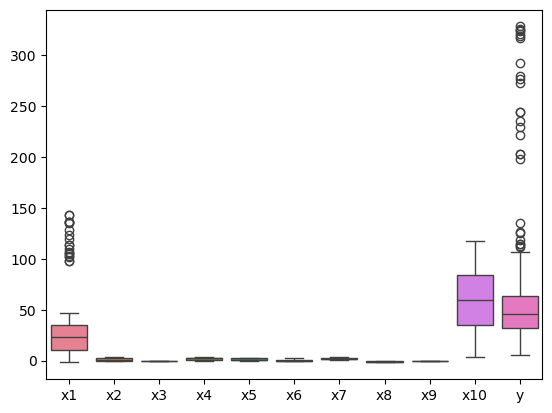

In [4095]:
sns.boxplot(df_train)

In [4096]:
# def remove_outliers_iqr(df, threshold=1.5):
#     """
#     Removes outliers from a Pandas DataFrame using the IQR method.
#     """
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR
    
#     # Keep only rows where all column values are within the bounds
#     filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
#     return filtered_df

# df_train = remove_outliers_iqr(df_train)

In [4097]:
def handle_outliers_fixed(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_result = df.copy()
    
    for col in numeric_cols:
        Q1 = df_result[col].quantile(0.25)
        Q3 = df_result[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median_value = df_result[col].median()
        
        # Penggantian nilai hanya pada kolom numerik
        outlier_mask = (df_result[col] < lower_bound) | (df_result[col] > upper_bound)
        df_result[col] = df_result[col].where(~outlier_mask, median_value)

    return df_result

df_train = handle_outliers_fixed(df_train)

<Axes: >

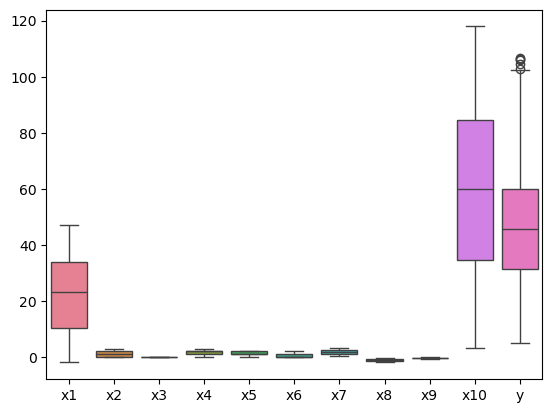

In [4098]:
sns.boxplot(df_train)

In [4099]:
df_train.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

# Exploratory Data Analysis

## Cek Korelasi

## Variabel Numerik

In [4100]:
df_train[numerical_cols]

,x1,x7,x8,x9,x10
0,0.407166,1.127628,-0.657689,-0.415323,76.124758
1,44.417166,0.957628,-0.667689,-0.475323,85.834758
2,28.047166,0.717628,-1.107689,-0.385323,13.814758
3,-0.462834,1.717628,-1.547689,-0.425323,29.344758
4,42.957166,0.747628,-1.847689,-0.135323,59.799758
...,...,...,...,...,...
795,18.237166,2.857628,-1.727689,-0.435323,82.144758
796,37.787166,2.147628,-1.747689,-0.315323,32.374758
797,36.127166,0.437628,-0.857689,-0.185323,62.894758
798,32.477166,2.447628,-1.207689,-0.465323,77.094758


In [4101]:
df_numeric_corr = df_train[['x1', 'x7', 'x8', 'x9', 'x10', 'y']].corr(method='pearson')
df_numeric_corr

,x1,x7,x8,x9,x10,y
x1,1.000000,0.049556,-0.082332,0.023218,-0.032139,0.656644
x7,0.049556,1.000000,-0.004398,-0.038541,-0.009110,0.029957
x8,-0.082332,-0.004398,1.000000,0.032763,0.008577,0.329832
x9,0.023218,-0.038541,0.032763,1.000000,-0.033147,0.258174
x10,-0.032139,-0.009110,0.008577,-0.033147,1.000000,0.317079
y,0.656644,0.029957,0.329832,0.258174,0.317079,1.000000


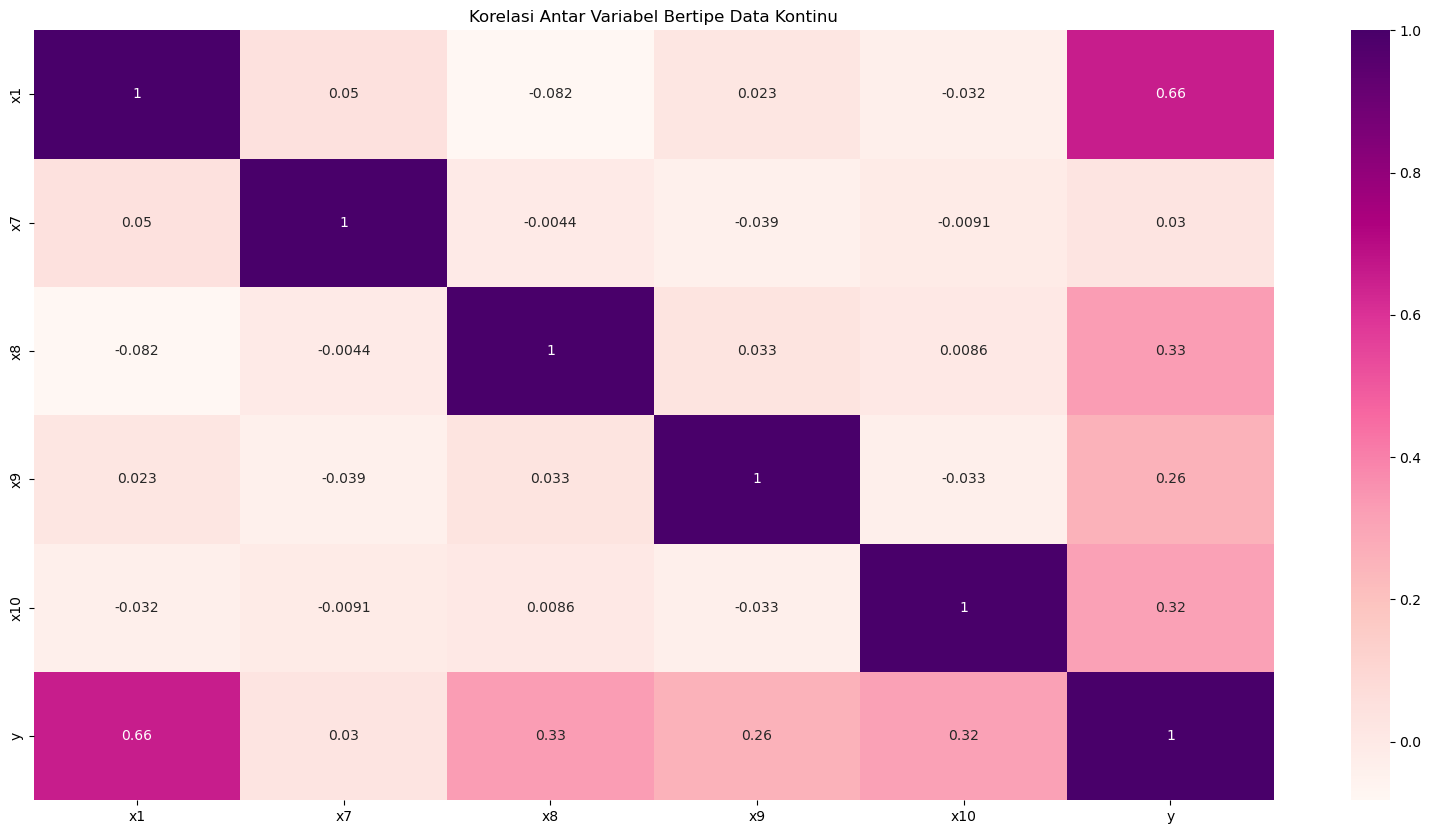

In [4102]:
plt.figure(figsize=(20, 10))
plt.title('Korelasi Antar Variabel Bertipe Data Kontinu')
sns.heatmap(df_numeric_corr, annot=True, cmap='RdPu')
plt.show()

## Variabel Kategorik

C:\Users\user\AppData\Local\Temp\ipykernel_31728\2711945126.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results[col] = aov_table['PR(>F)'][0]
C:\Users\user\AppData\Local\Temp\ipykernel_31728\2711945126.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results[col] = aov_table['PR(>F)'][0]
C:\Users\user\AppData\Local\Temp\ipykernel_31728\2711945126.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results[col] = aov_ta

<Axes: >

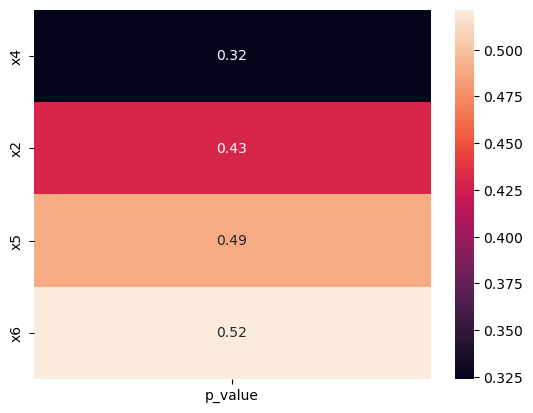

In [4103]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = {}

for col in df_train[categorical_cols].drop('x3', axis=1).columns.to_list():
    if df_train[col].nunique() < 2:
        results[col] = None
        continue

    model = ols(f'y ~ C({col})', data=df_train).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    results[col] = aov_table['PR(>F)'][0]

nominal_corr = pd.DataFrame.from_dict(
    results, orient='index', columns=['p_value']
).sort_values('p_value')

sns.heatmap(nominal_corr, annot=True)

In [4104]:
df_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,22.470441,1.038750,0.0,1.487500,1.171250,0.336250,1.750628,-1.180351,-0.323435,59.552033,47.454692
std,13.850456,1.045761,0.0,1.063606,0.726349,0.566646,0.840036,0.419552,0.113046,30.958142,21.832609
min,-1.642834,0.000000,0.0,0.000000,0.000000,0.000000,0.257628,-1.917689,-0.515323,3.134758,5.120804
25%,10.337166,0.000000,0.0,1.000000,1.000000,0.000000,1.037628,-1.537689,-0.415323,34.652258,31.496304
50%,23.217166,1.000000,0.0,2.000000,1.000000,0.000000,1.777628,-1.202689,-0.325323,59.799758,45.788304
75%,34.004666,2.000000,0.0,2.000000,2.000000,1.000000,2.425128,-0.827689,-0.235323,84.572258,59.904729
max,47.117166,3.000000,0.0,3.000000,2.000000,2.000000,3.247628,-0.417689,-0.115323,117.924758,106.704304


# Modelling

In [4105]:
X = df_train.drop(['y', 'x3'], axis=1)
y = df_train['y']

In [4106]:
from sklearn.model_selection import train_test_split

In [4107]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=42 
)

In [4108]:
# scaler = StandardScaler()
# X_scaled_values = scaler.fit_transform(X_train)

In [4109]:
# X_constant = sm.add_constant(X_scaled_values) 

In [4110]:
# Lakukan Regresi OLS, dan minta Robust Standard Errors (HC3)
model = sm.OLS(Y_train, X_train).fit()

print("Hasil Regresi:")
print(model.summary())

Hasil Regresi:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              979.2
Date:                Sun, 14 Dec 2025   Prob (F-statistic):                        0.00
Time:                        07:20:33   Log-Likelihood:                         -2400.5
No. Observations:                 600   AIC:                                      4819.
Df Residuals:                     591   BIC:                                      4859.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [4111]:
# X_val_const = sm.add_constant(X_val)

In [4112]:
Y_val_pred = model.predict(X_val)

In [4113]:
df_train['y'].std()

21.83260912109623

In [4114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mae = mean_absolute_error(Y_val, Y_val_pred)
rmse = np.sqrt(mean_squared_error(Y_val, Y_val_pred))
r_squared = r2_score(Y_val, Y_val_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r_squared:.4f}")

MAE: 10.8922
RMSE: 14.5375
R-squared: 0.4944


In [4115]:
X_test = df_test.drop(['x3'], axis=1)

In [4116]:
Y_pred_test = model.predict(X_test)

In [4117]:
df_test['y'] = Y_pred_test
df_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,16.787166,3,0,1,1,0,2.807628,-0.687689,-0.175323,103.314758,66.337637
1,38.137166,2,0,2,2,0,2.197628,-0.617689,-0.195323,14.644758,66.336656
2,20.797166,1,0,2,2,2,3.007628,-0.687689,-0.235323,41.574758,57.740483
3,15.577166,0,0,2,2,0,0.707628,-0.827689,-0.125323,107.614758,60.366226
4,44.677166,2,0,1,1,0,3.027628,-0.447689,-0.345323,92.434758,98.044681
...,...,...,...,...,...,...,...,...,...,...,...
188,42.487166,0,0,2,2,1,0.907628,-0.637689,-0.355323,66.764758,82.158041
189,-1.162834,2,0,0,0,0,2.697628,-1.147689,-0.435323,85.934758,20.634882
190,-1.622834,0,0,1,1,1,2.217628,-0.927689,-0.305323,10.884758,2.632986
191,2.137166,0,0,1,1,1,1.877628,-1.627689,-0.245323,56.104758,14.938350


In [4118]:
df_result = pd.DataFrame()

In [4119]:
df_result['ID'] = df_test.index + 1

In [4120]:
df_result['y'] = df_test['y']

In [4121]:
df_result

,ID,y
0,1,66.337637
1,2,66.336656
2,3,57.740483
3,4,60.366226
4,5,98.044681
...,...,...
188,189,82.158041
189,190,20.634882
190,191,2.632986
191,192,14.938350


In [4122]:
df_result.to_csv('24083010002_statistika-regresi-sains-data.csv')

# Uji Residual

In [4123]:
residuals = model.resid

## Uji Normalitas

In [4124]:
stat, p_value = shapiro(residuals)
print(f"Uji Normalitas Shapiro-Wilk: Statistik={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
    print("Residual terdistribusi normal")
else:
    print("Residual tidak normal")

Uji Normalitas Shapiro-Wilk: Statistik=0.9836, p-value=0.0000
Residual tidak normal


## Uji Multikolinearitas

In [4125]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["1/VIF"] = 1 / vif_data["VIF"]
print("\nVIF:\n", vif_data)


VIF:
   feature       VIF     1/VIF
0      x1  3.410683  0.293196
1      x2  1.934989  0.516799
2      x4  2.804401  0.356582
3      x5  3.316193  0.301551
4      x6  1.352752  0.739234
5      x7  4.824568  0.207272
6      x8  7.071389  0.141415
7      x9  7.234637  0.138224
8     x10  4.198279  0.238193


## Uji Heteroskedastisitas

In [4126]:
bp_test = het_breuschpagan(residuals, X_constant)
labels = ['LM Stat', 'LM p-value', 'F-stat', 'F p-value']
bp_result = dict(zip(labels, bp_test))
print("\nUji Breusch-Pagan:", bp_result)
if bp_result['F p-value'] > 0.05:
    print("Tidak ada heteroskedastisitas")
else:
    print("Ada heteroskedastisitas")


Uji Breusch-Pagan: {'LM Stat': 60.25715393274855, 'LM p-value': 1.1960758284880827e-09, 'F-stat': 7.31865411656752, 'F p-value': 3.8395358997897304e-10}
Ada heteroskedastisitas


## Uji Autokorelasi

In [4127]:
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f"\nDurbin-Watson: {dw_stat:.3f}")


Durbin-Watson: 1.935


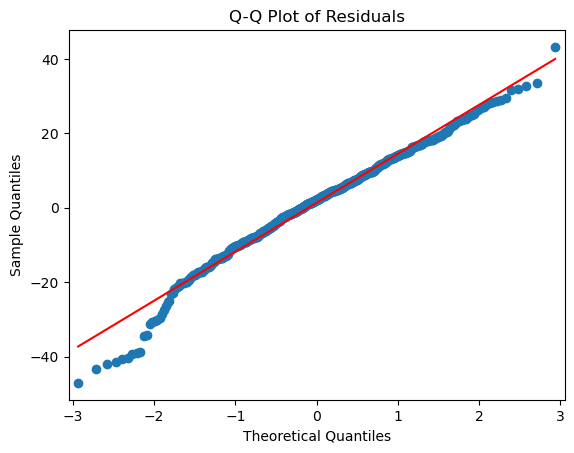

In [4128]:
fig = sm.qqplot(residuals, line='s')

# 2. Menambahkan Judul dan Label
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# 3. Menampilkan Plot
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1. MEMUAT DATA ---
# Muat data pelatihan dan pengujian
df_train = pd.read_csv('dataset/train_dataset.csv')
df_test = pd.read_csv('dataset/test_dataset_no_y.csv')

# --- 2. PERSIAPAN DATA ---
# A. Tangani Missing Value pada Target 'y' (hanya di Training)
y_imputed = df_train['y'].fillna(df_train['y'].mean())
X_train_full = df_train.drop('y', axis=1)
X_test = df_test.copy()

# B. Mendefinisikan Tipe Fitur (x4 sebagai KATEGORIKAL)
# Fitur Numerik yang akan dipolynomialkan
numeric_features = ['x1', 'x7', 'x8', 'x9', 'x10']
# Fitur Kategorikal (termasuk x4)
categorical_features = ['x2', 'x3', 'x5', 'x6', 'x4']

# --- 3. PEMBUATAN PIPELINE PREPROCESSING ---
# A. Transformer untuk Fitur Numerik (Imputasi Mean)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# B. Transformer untuk Fitur Kategorikal (Imputasi Mode & OHE)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# C. Menggabungkan Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# --- 4. PEMBANGUNAN MODEL AKHIR (Polynomial Regression, Order 2) ---
final_model_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Menambahkan Fitur Polinomial Derajat 2
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
    ('regressor', LinearRegression())
])

# --- 5. EVALUASI VALIDASI (Opsional: untuk melihat kinerja) ---
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_full, y_imputed, test_size=0.2, random_state=42
)

final_model_poly_val = final_model_poly.fit(X_train_split, y_train_split)
y_pred_val_poly = final_model_poly_val.predict(X_val)

mae_val_poly = mean_absolute_error(y_val, y_pred_val_poly)
r2_val_poly = r2_score(y_val, y_pred_val_poly)

print(f"Evaluasi Model Polinomial (Order 2) pada Data Validasi (20%):")
print(f"MAE: {mae_val_poly:.4f}")
print(f"R-squared: {r2_val_poly:.4f}")

# --- 6. PREDIKSI AKHIR UNTUK SUBMISSION ---
# Latih ulang model final pada SELURUH data pelatihan
final_model_poly.fit(X_train_full, y_imputed)

# Buat prediksi pada data pengujian
y_pred_final_poly = final_model_poly.predict(X_test)

# --- 7. PEMBUATAN FILE SUBMISSION ---
df_submission_poly = pd.DataFrame()
# ID dimulai dari 1 (Indeks 0 + 1)
df_submission_poly['ID'] = df_test.index + 1 
df_submission_poly['y'] = y_pred_final_poly

output_file_poly = 'submission_polynomial_regression.csv'
df_submission_poly.to_csv(output_file_poly, index=False)

print(f"\nFile submission telah dibuat: {output_file_poly}")

Evaluasi Model Polinomial (Order 2) pada Data Validasi (20%):
MAE: 9.7584
R-squared: 0.7515

File submission telah dibuat: submission_polynomial_regression.csv
